In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('../dataset/concrete_data.csv')

# Univariate

In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [7]:
df.isna().any(axis=0).sort_values(ascending=False)

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

<Axes: xlabel='fly_ash', ylabel='Count'>

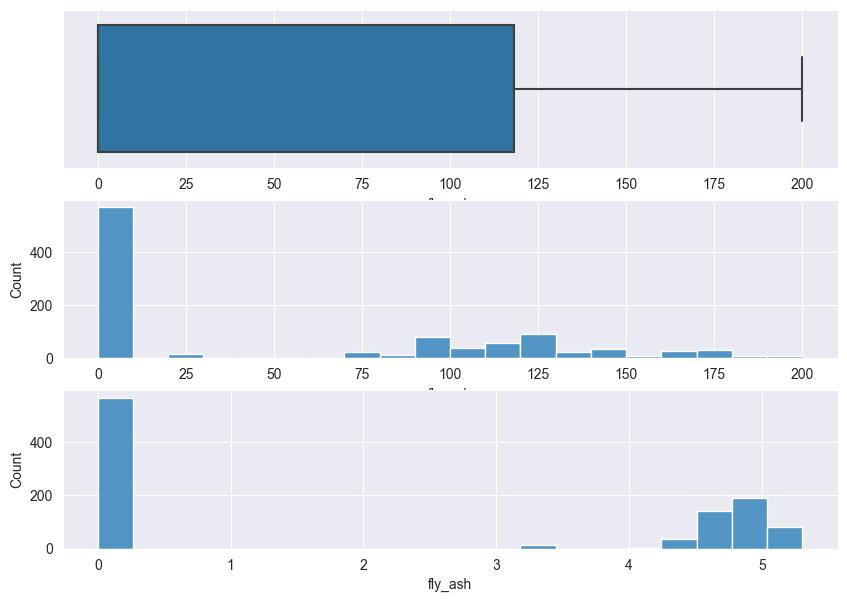

In [16]:
fig, ax = plt.subplots(3,1, figsize=(10,7))
sns.boxplot(x=df['fly_ash'], ax=ax[0])
sns.histplot(df['fly_ash'], bins=20, kde=False, ax=ax[1])
sns.histplot(np.log(df['fly_ash'] + 1), bins=20, kde=False, ax=ax[2])

# Multivariate

In [17]:
corr_mat_non_linear = df.corr(method='spearman')
corr_mat = df.corr(method='pearson')

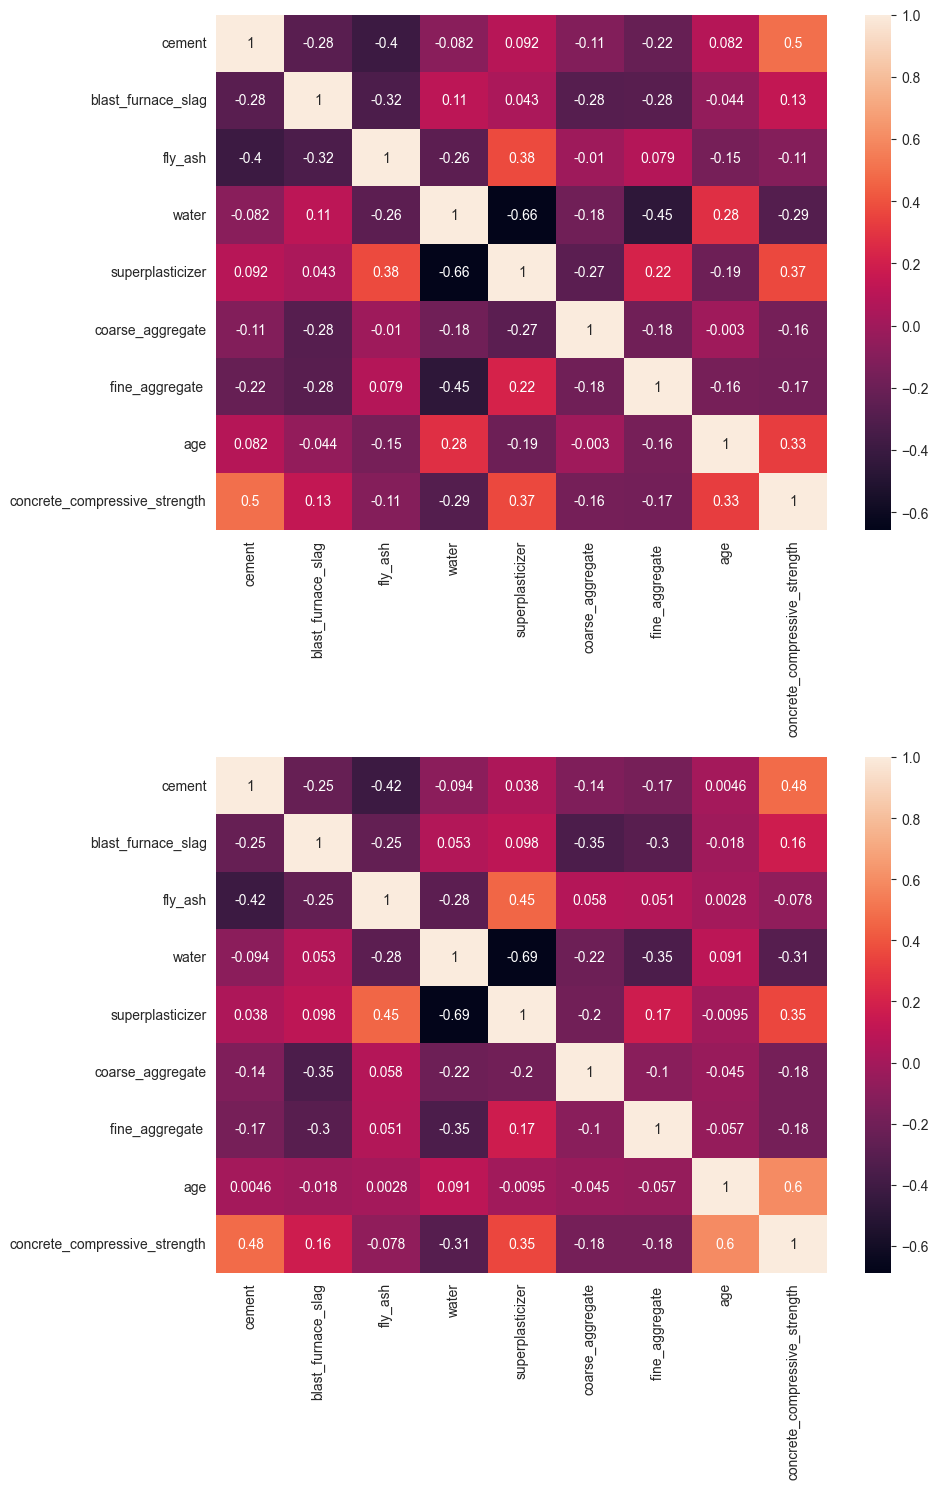

In [32]:
fig, ax = plt.subplots(2,1, figsize = (10,15))
sns.heatmap(corr_mat, ax=ax[0], annot=True)
sns.heatmap(corr_mat_non_linear, ax=ax[1], annot=True)
plt.tight_layout()
plt.show()

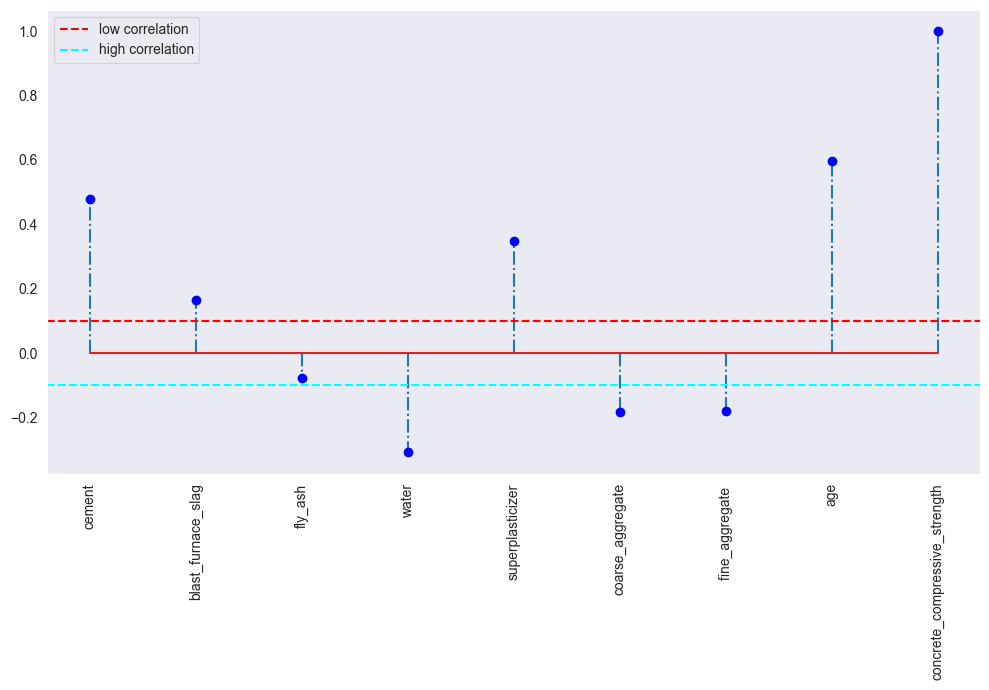

In [31]:
target_corr = corr_mat_non_linear['concrete_compressive_strength']

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.stem(list(df.columns), target_corr, linefmt='-.', markerfmt='bo')
ax.axhline(y=0.1, color='red', linestyle='--', label='low correlation')
ax.axhline(y=-0.1, color='cyan', linestyle='--', label='high correlation')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [30]:
target_corr

cement                           0.477614
blast_furnace_slag               0.164105
fly_ash                         -0.077830
water                           -0.308414
superplasticizer                 0.347786
coarse_aggregate                -0.183542
fine_aggregate                  -0.179962
age                              0.596028
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

# Feature importance

In [33]:
X = df.drop(columns=["concrete_compressive_strength"]).values
y = df["concrete_compressive_strength"].values

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

In [39]:
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

5.490447158991832
0.8851354373341692


In [40]:
feature_names = df.drop(columns=["concrete_compressive_strength"]).columns
sorted(zip(feature_names, reg.feature_importances_), key=lambda x: x[1], reverse=True)

[('age', 0.3294679334945805),
 ('cement', 0.3208240388388405),
 ('water', 0.1176630918187129),
 ('blast_furnace_slag', 0.07282757696319311),
 ('superplasticizer', 0.07066465816511815),
 ('fine_aggregate ', 0.0382926258469232),
 ('coarse_aggregate', 0.026685268306048344),
 ('fly_ash', 0.0235748065665834)]

### try to delete less important features

In [41]:
X = df.drop(columns=["concrete_compressive_strength", "fly_ash", "coarse_aggregate"]).values
y = df["concrete_compressive_strength"].values

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

5.403008276712589
0.8896512234877525


In [44]:
feature_names = df.drop(columns=["concrete_compressive_strength", "fly_ash", "coarse_aggregate"]).columns
sorted(zip(feature_names, reg.feature_importances_), key=lambda x: x[1], reverse=True)

[('cement', 0.3359942014855553),
 ('age', 0.33123455332354856),
 ('water', 0.12247501772358364),
 ('blast_furnace_slag', 0.08650306793059828),
 ('superplasticizer', 0.07980825721229104),
 ('fine_aggregate ', 0.04398490232442321)]